<a href="https://colab.research.google.com/github/EyaSriwi/Cost-Project/blob/main/data_cleaning_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Load the Data
df = pd.read_excel("Maintenance.xlsx")
df.head()

,BelegDat,Kurztext,Menge,Nettpreis,Nettowert,Sicherheitsbestand,Standort,Artikel Zustand,Warengrp,Lort,Benutzer,Kein Teil,BDR,Kostenstelle
0,2018-04-16,AC-Servoantrieb FHA-32-C-100-H-C1024-B,1.0,6298.11,6298.11,0,Étranger,No Mover,1017,008 Instandhaltung,BOUDHRIOUA,5000473493,NaN,1520
1,2020-02-18,Eingangskarte EK* 32E,1.0,574.30,574.30,1,Étranger,No Mover,1017,008 Instandhaltung,BOUDHRIOUA,5000473493,NaN,231520
2,2020-02-18,800803 Zentraleinheit X-CNC 32-Bit,1.0,5176.50,5176.50,1,Étranger,No Mover,1017,008 Instandhaltung,BOUDHRIOUA,5000473461,NaN,231520
3,2020-01-01,Haube,2.0,500.00,1000.00,1,Étranger,No Mover,1017,008 Instandhaltung,BOUDHRIOUA,5000473493,NaN,231520
4,2020-01-01,Gewinde Buchse Z AXE,4.0,58.00,232.00,0,Étranger,No Mover,1017,008 Instandhaltung,BOUDHRIOUA,5000473493,NaN,231520


#Descriptive Statistics

In [75]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
BelegDat,3806,2022-12-04 06:37:16.048344576,2018-04-16 00:00:00,2022-05-28 00:00:00,2022-12-05 00:00:00,2023-06-09 00:00:00,2023-12-31 00:00:00,NaN
Menge,3806.0,0.436679,-80.0,-2.0,-1.0,-1.0,300.0,17.508415
Nettpreis,3806.0,8.402451,-921.05,-26.1747,-9.0196,-1.208325,6722.9,224.575122
Nettowert,3806.0,825.387993,0.01,9.1678,26.83,159.128,172000.0,6577.309423
Sicherheitsbestand,3806.0,2.944561,0.0,0.0,1.0,2.0,100.0,6.115775
Warengrp,3806.0,1017.0,1017.0,1017.0,1017.0,1017.0,1017.0,0.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BelegDat            3806 non-null   datetime64[ns]
 1   Kurztext            3806 non-null   object        
 2   Menge               3806 non-null   float64       
 3   Nettpreis           3806 non-null   float64       
 4   Nettowert           3806 non-null   float64       
 5   Sicherheitsbestand  3806 non-null   int64         
 6   Standort            3806 non-null   object        
 7   Artikel Zustand     43 non-null     object        
 8   Warengrp            3806 non-null   int64         
 9   Lort                3806 non-null   object        
 10  Benutzer            3032 non-null   object        
 11  Kein Teil           556 non-null    object        
 12  BDR                 2437 non-null   object        
 13  Kostenstelle        3032 non-null   object      

In [77]:
df.shape

(3806, 14)

# Handling Missing Values

In [78]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Combine the missing values count and percentage into a DataFrame
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

print(missing_data_info)

                    Missing Values  Missing Percentage
BelegDat                         0            0.000000
Kurztext                         0            0.000000
Menge                            0            0.000000
Nettpreis                        0            0.000000
Nettowert                        0            0.000000
Sicherheitsbestand               0            0.000000
Standort                         0            0.000000
Artikel Zustand               3763           98.870205
Warengrp                         0            0.000000
Lort                             0            0.000000
Benutzer                       774           20.336311
Kein Teil                     3250           85.391487
BDR                           1369           35.969522
Kostenstelle                   774           20.336311


# Removing unnecessary columns from the dataframe

In [79]:
# List of columns to be deleted
columns_to_delete = ['Benutzer', 'Kein Teil', 'BDR','Kostenstelle']

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

# Update Status Column

In [80]:
# Convert 'Date' column to datetime format
df['BelegDat'] = pd.to_datetime(df['BelegDat'])

# Group by 'Désignation'
groups = df.groupby('Kurztext')

# Define a function to calculate the difference in months between consecutive dates
def calculate_date_diff(group):
    group = group.sort_values('BelegDat')
    group['DateDiff'] = group['BelegDat'].diff().dt.days / 30
    return group

# Apply the function to each group and update the 'Statu' column based on the condition
for name, group in groups:
    group = calculate_date_diff(group)
    nan_statu_indices = group[group['Artikel Zustand'].isna()].index
    group.loc[nan_statu_indices, 'Artikel Zustand'] = 'Slow Mover'
    group.loc[group['DateDiff'] < 6, 'Artikel Zustand'] = 'Fast Mover'
    df.update(group)
    # Set 'Statu' to 'No Mover' where 'reference' is '32C-100-1'
#df.loc[df['reference'] == '32C-100-1', 'Artikel Zustand'] = 'No Mover'


In [81]:
df

,BelegDat,Kurztext,Menge,Nettpreis,Nettowert,Sicherheitsbestand,Standort,Artikel Zustand,Warengrp,Lort
0,2018-04-16,AC-Servoantrieb FHA-32-C-100-H-C1024-B,1.0,6298.11,6298.11,0,Étranger,No Mover,1017,008 Instandhaltung
1,2020-02-18,Eingangskarte EK* 32E,1.0,574.30,574.30,1,Étranger,No Mover,1017,008 Instandhaltung
2,2020-02-18,800803 Zentraleinheit X-CNC 32-Bit,1.0,5176.50,5176.50,1,Étranger,No Mover,1017,008 Instandhaltung
3,2020-01-01,Haube,2.0,500.00,1000.00,1,Étranger,No Mover,1017,008 Instandhaltung
4,2020-01-01,Gewinde Buchse Z AXE,4.0,58.00,232.00,0,Étranger,No Mover,1017,008 Instandhaltung
...,...,...,...,...,...,...,...,...,...,...
3801,2023-12-26,Fliessfett f. Zentralschm. MOROFF 708900,-1.0,-19.62,19.62,0,Étranger,Fast Mover,1017,008 Instandhaltung
3802,2023-01-12,Fliessfett f. Zentralschm. MOROFF 708900,-1.0,-19.62,19.62,0,Étranger,Slow Mover,1017,008 Instandhaltung
3803,2023-07-11,Fliessfett f. Zentralschm. MOROFF 708900,-1.0,-19.62,19.62,0,Étranger,Fast Mover,1017,008 Instandhaltung
3804,2023-04-10,Fliessfett f. Zentralschm. MOROFF 708900,-1.0,-19.62,19.62,0,Étranger,Fast Mover,1017,008 Instandhaltung


# Data Visualization

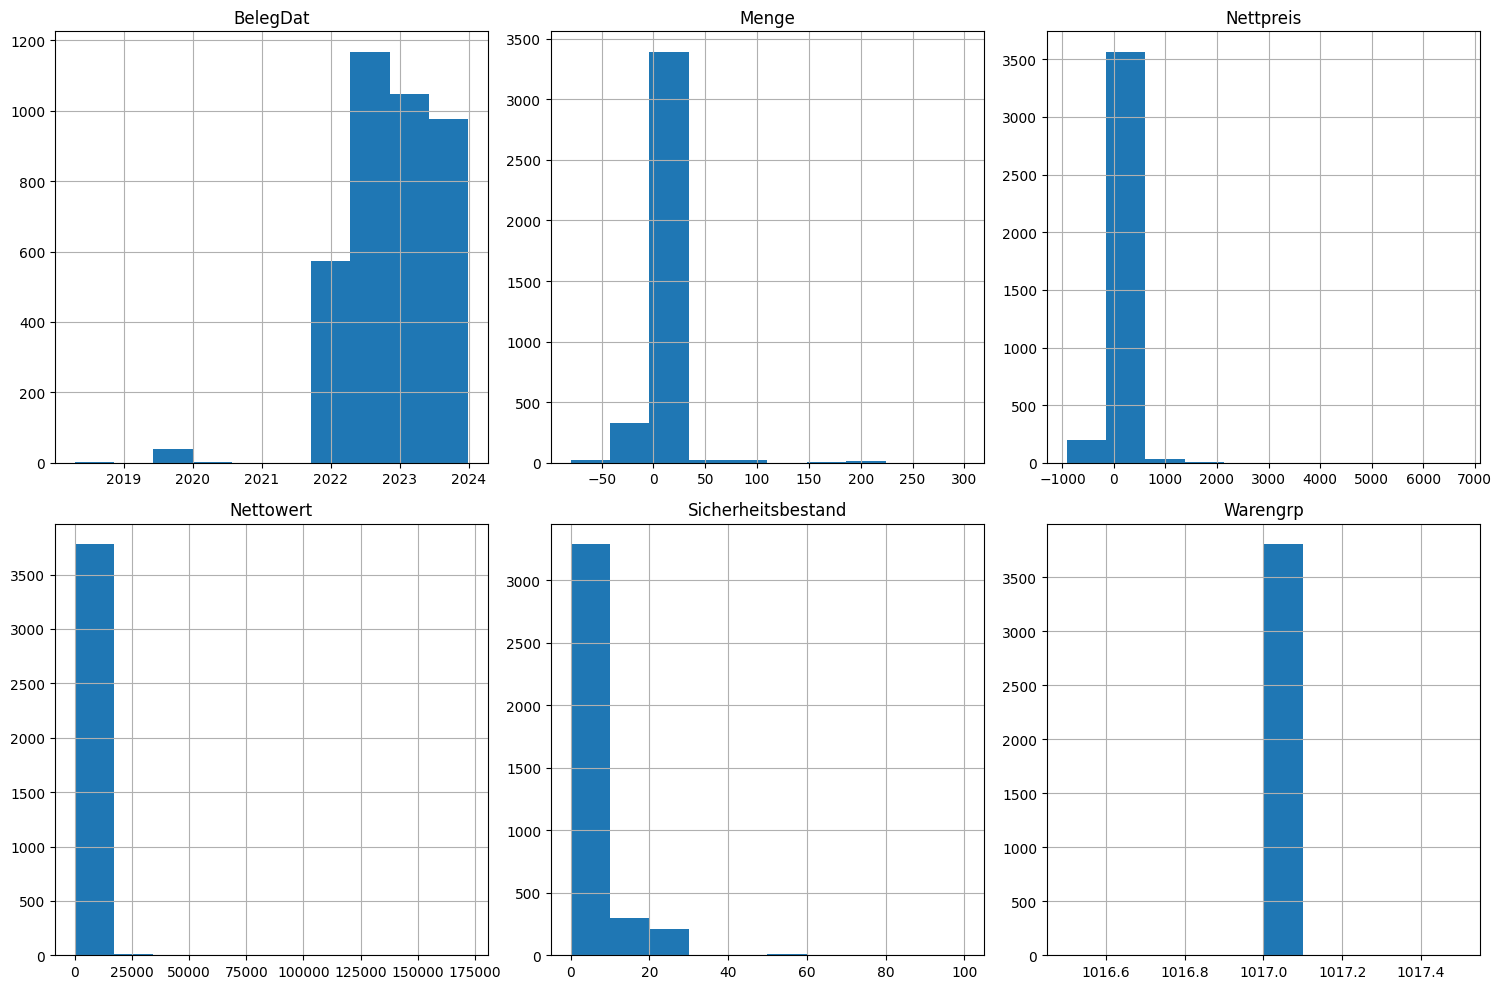

In [82]:
# Display histograms for all numerical columns with 3 graphs per row and smaller plots
num_columns = df.select_dtypes(include=['number']).columns
num_plots = len(num_columns)
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate the number of rows needed

df.hist(figsize=(15, 10), layout=(rows, 3))
plt.tight_layout()
plt.show()

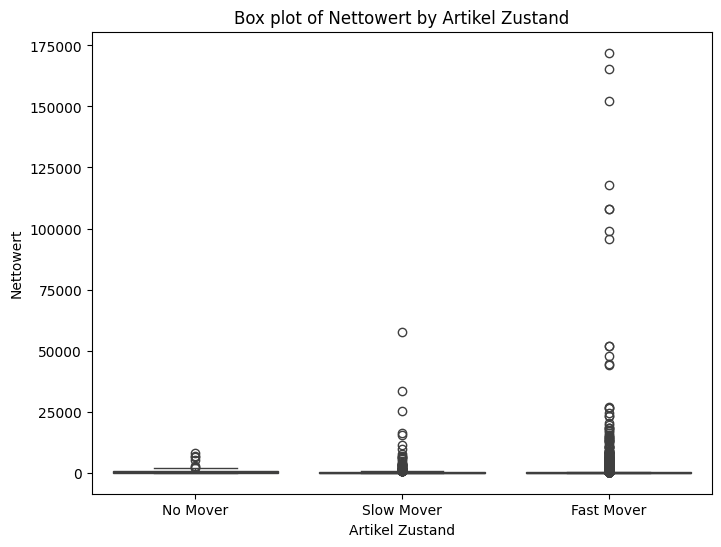

In [83]:
# Box plot for "Nettowert" by "Artikel Zustand"
plt.figure(figsize=(8, 6))
sns.boxplot(x="Artikel Zustand", y="Nettowert", data=df)
plt.title('Box plot of Nettowert by Artikel Zustand')
plt.show()

Artikel Zustand  Fast Mover  No Mover  Slow Mover
Standort                                         
Local                  1017         7         129
Étranger               2186        36         431


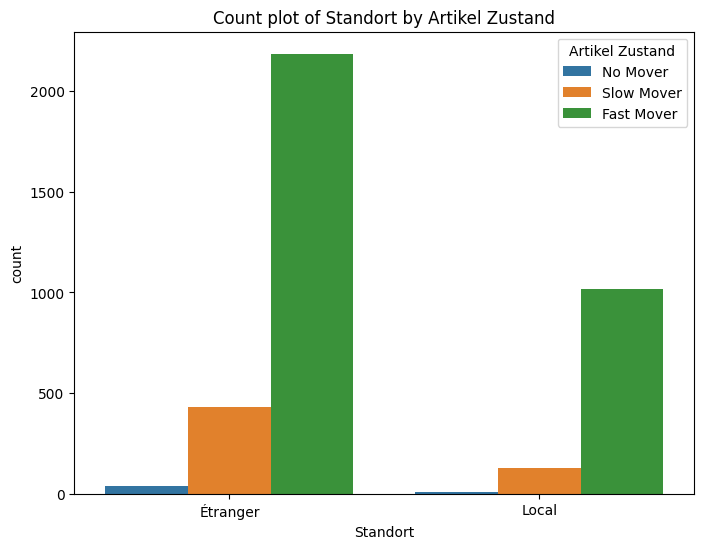

In [84]:
# Crosstab for Standort and Artikel Zustand
print(pd.crosstab(df['Standort'], df['Artikel Zustand']))
# Count plot for Standort by Artikel Zustand
plt.figure(figsize=(8, 6))
sns.countplot(x="Standort", hue="Artikel Zustand", data=df)
plt.title('Count plot of Standort by Artikel Zustand')
plt.show()

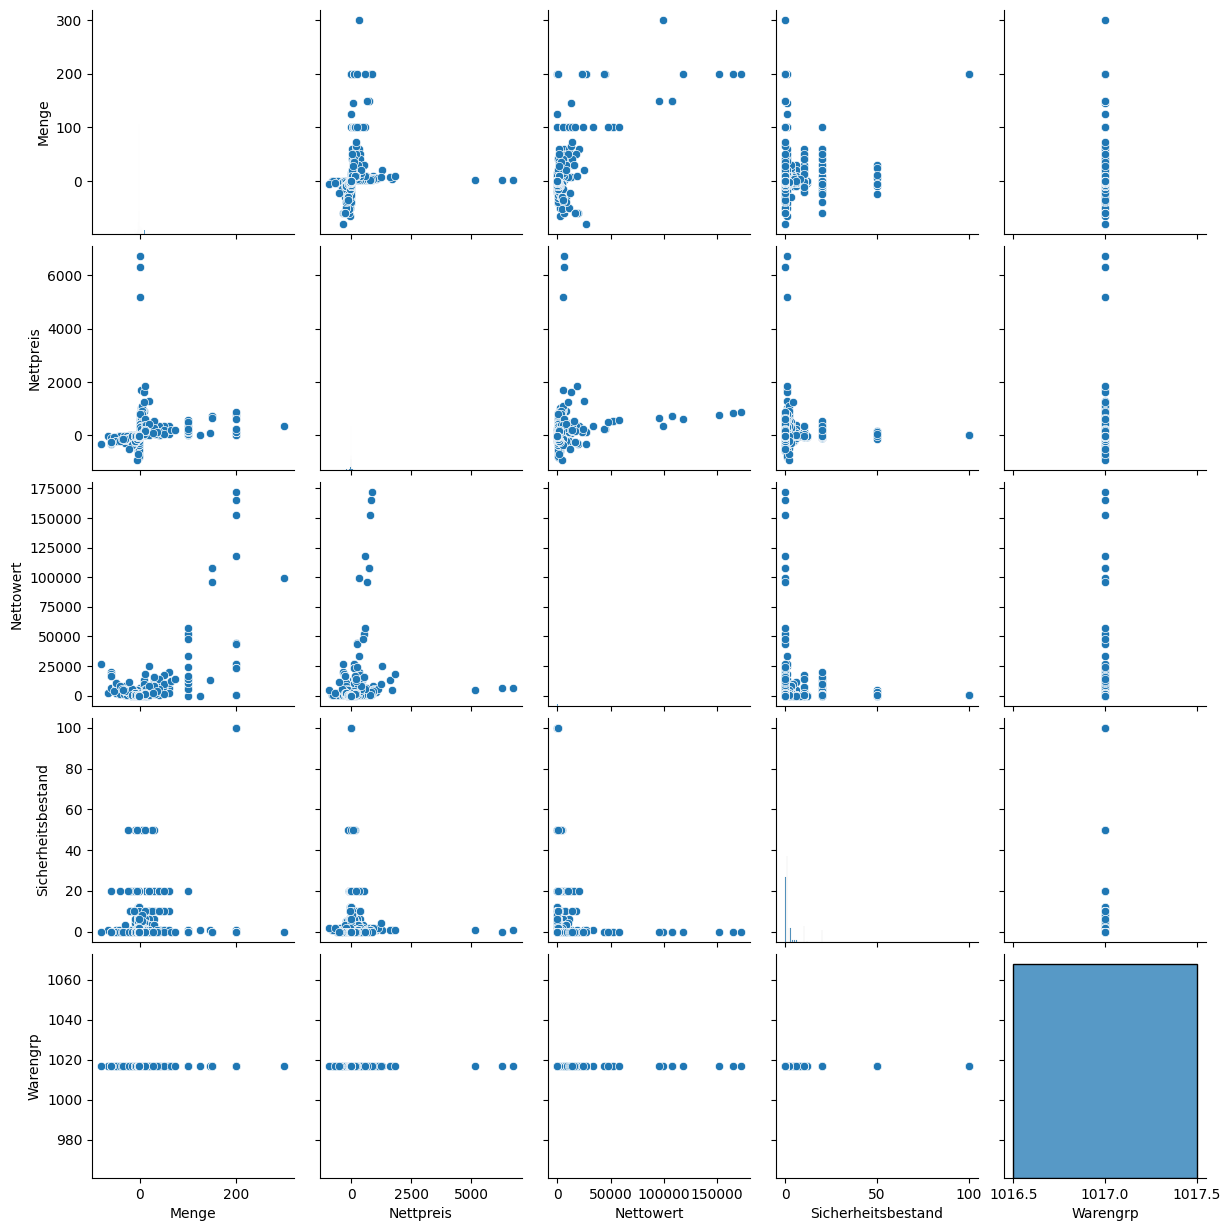

In [85]:

# Pair plot for numerical columns
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [86]:
df['Standort'] = df['Standort'].replace(to_replace={'Local':0,'Étranger':1})
df['Artikel Zustand'] = df['Artikel Zustand'].replace(to_replace={'No Mover':0,'Fast Mover':1,'Slow Mover':2})

In [87]:
# Summary statistics for "Nettowert"
print(f'Standard Deviation of Nettowert: {df["Nettowert"].std()}')
print(f'Mean of Nettowert: {df["Nettowert"].mean()}')

Standard Deviation of Nettowert: 6577.309422898073
Mean of Nettowert: 825.3879927548608


<ipython-input-88-52ad86fe9d5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Nettowert'], kde=True)


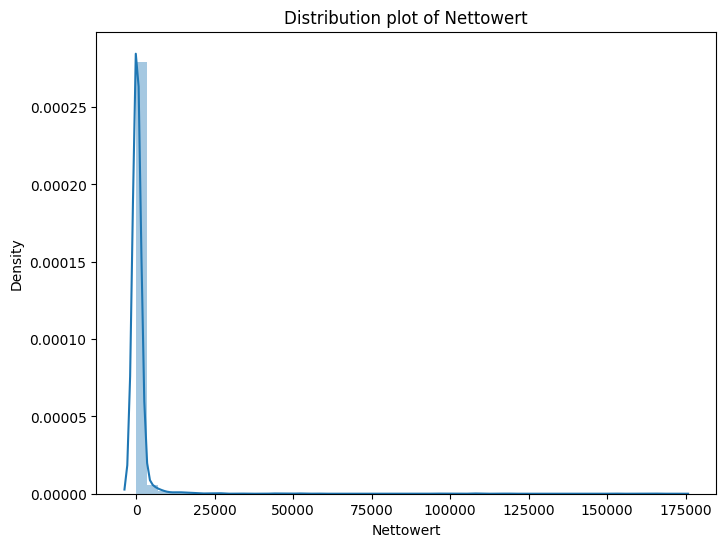

In [88]:
# Distribution plot for "Nettowert"
plt.figure(figsize=(8, 6))
sns.distplot(df['Nettowert'], kde=True)
plt.title('Distribution plot of Nettowert')
plt.show()

In [89]:
# Correlation matrix for numerical columns only
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
print(corr)

                       Menge  Nettpreis  Nettowert  Sicherheitsbestand  \
Menge               1.000000   0.209040   0.630305            0.157296   
Nettpreis           0.209040   1.000000   0.220605           -0.004934   
Nettowert           0.630305   0.220605   1.000000           -0.018249   
Sicherheitsbestand  0.157296  -0.004934  -0.018249            1.000000   
Standort           -0.011775   0.048667   0.033596           -0.004668   
Artikel Zustand     0.029354  -0.045031  -0.012180           -0.017954   
Warengrp                 NaN        NaN        NaN                 NaN   

                    Standort  Artikel Zustand  Warengrp  
Menge              -0.011775         0.029354       NaN  
Nettpreis           0.048667        -0.045031       NaN  
Nettowert           0.033596        -0.012180       NaN  
Sicherheitsbestand -0.004668        -0.017954       NaN  
Standort            1.000000         0.052908       NaN  
Artikel Zustand     0.052908         1.000000       NaN  
W

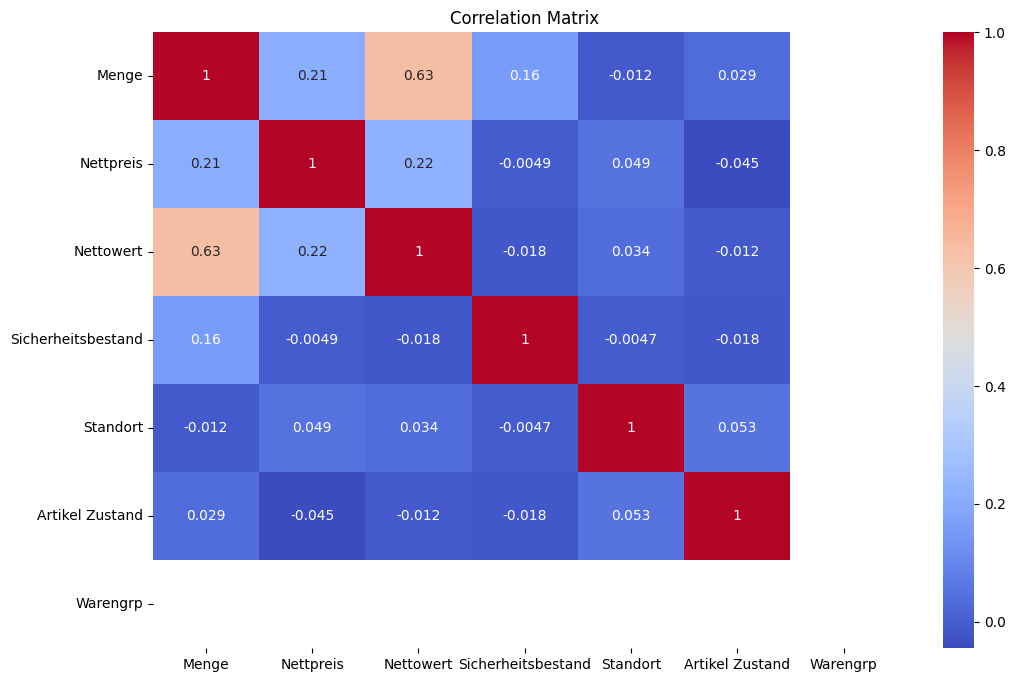

In [90]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()